**Thinkful - 3.3.4 - Challenge - Logistic, Ridge and Lasso Models**

In [5]:
import math
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
sns.set(style="white", context="talk")

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd")
 
#Read file and remove commas from numbers (currently strings)
df2 = pd.read_csv('Data/Table_8_Offenses_Known_to_Law_Enforcement_by_State_by_City_2013_v2.csv')
print(len(df2))
#df = df2.iloc[:,:].dropna()
df = df2.dropna()
print(len(df))

variables = ['Population','Murder','Violent crime','Robbery','Aggravated assault','Arson',
            'Property crime','Burglary','Larceny-theft','Motor vehicle theft','Rape']
'''df[variables] = df[variables].astype(int)
df['State'] = df['State'].map(lambda x: x.title())
df.head()'''

9289
9289


"df[variables] = df[variables].astype(int)\ndf['State'] = df['State'].map(lambda x: x.title())\ndf.head()"

**Create An Outcome Variable**

In [7]:
population = df['Population']
df['Property Crime Per Capita'] = df['Property crime']/population
prop_crime_pc = df['Property Crime Per Capita']

is_safe = []
for j in range(len(prop_crime_pc)):
    if prop_crime_pc[j]<0.05:
        is_safe.append(0)
    else:
        is_safe.append(1)
df['Is Safe'] = pd.Series(is_safe, index=df.index)

**Creating New Features**

We currently have 9 features, so I created 6 more.

In [19]:
#Create variable for murder per capita and append to dataframe
df['Robbery Per Capita'] = df['Robbery']/population
df['Murder Per Capita'] = df['Murder']/population
df['Robbery-Murder'] = df['Robbery'] * df['Murder']
df['Robbery-Larceny'] = df['Robbery'] * df['Larceny-theft']

# Create feature for region
Region = []
Northeast = ['Connecticut','Maine','Massachusetts','New Hampshire','Rhode Island', 
             'Vermont','New Jersey','New York','Pennsylvania']
Midwest = ['Illinois','Indiana','Michigan','Ohio','Wisconsin','Iowa','Kansas', 
           'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota']
South = ['Delaware','Florida','Georgia','Maryland','North Carolina','South Carolina',
        'Virginia','District of Columbia','West Virginia','Alabama','Kentucky', 
        'Mississippi','Tennessee','Arkansas','Louisiana','Oklahoma','Texas']
West = ['Arizona','Colorado','Idaho','Montana','Nevada','New Mexico','Utah','Wyoming', 
        'Alaska','California','Hawaii','Oregon','Washington']

for i in range(len(df['State'])):
    if df['State'][i] in Northeast:
        Region.append(0)
    elif df['State'][i] in Midwest:
        Region.append(1)
    elif df['State'][i] in South:
        Region.append(2)
    else:
        Region.append(3)

df['Region'] = pd.Series(Region, index=df.index) 

# Create feature for city size
Large_City = []
for j in range(len(df['Population'])):
    if df['Population'][j]<30000:
        Large_City.append(0)
    elif df['Population'][j]<60000:
        Large_City.append(1)
    else:
        Large_City.append(2)
df['Large City'] = pd.Series(Large_City, index=df.index)

In [20]:
features = ['Murder','Violent crime','Robbery','Aggravated assault','Arson',
            'Burglary','Larceny-theft','Motor vehicle theft','Rape',
            'Robbery Per Capita','Murder Per Capita','Large City','Region',
           'Robbery-Murder','Robbery-Larceny']
# Need more features + Region excluded because keyerror could not be converted to float

**Selection of regularization parameter for ridge and lasso regression**

After evaluating the impact of alpha on the R^2 value for both ridge and lasso regression (below), it appears that the R^2 value for the ridge regression model decreases as alpha increases (which is expected), whereas the R^2 value for lasso regression is consistently zero.

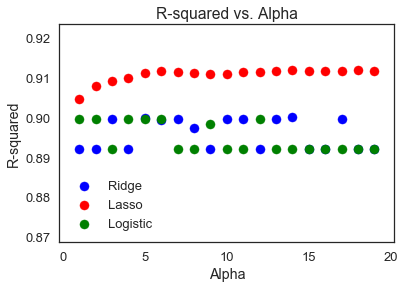

In [59]:
alphaStep = []
R2_log = []
R2_ridge = []
R2_lasso = []
Alph_1 = 1
i = 1
y = is_safe
    
while i < 20:
    
    #Logistic Regression
    lr = LogisticRegression(C=Alph_1)
    fit = lr.fit(X, y)
    R2_log.append(lr.score(X, y))
    
    #Ridge Regression
    lr_ridge = LogisticRegression(C=Alph_1,penalty='l2')
    fit_ridge = lr_ridge.fit(X, y)
    R2_ridge.append(lr_ridge.score(X, y))
    
    # Lasso Regression
    lr_lasso = LogisticRegression(C=Alph_1,penalty='l1')
    fit_lasso = lr_lasso.fit(X, y)
    R2_lasso.append(lr_lasso.score(X, y))
    
    # Iterate
    alphaStep.append(Alph_1)
    i += 1
    Alph_1 += 1

# Plot Results
plt.scatter(alphaStep,R2_ridge,color='blue')
plt.scatter(alphaStep,R2_lasso,color='red')
plt.scatter(alphaStep,R2_log,color='green')
plt.legend(['Ridge', 'Lasso','Logistic'])
plt.title('R-squared vs. Alpha')
plt.xlabel('Alpha')
plt.ylabel('R-squared')
plt.show()

**Logistic Regression**

In [60]:
# Declare a logistic regression classifier.
# Parameter regularization coefficient C described above. L2 = ridge, L2 = lasso
lr = LogisticRegression(C=5)
y = is_safe
X = df[features]

# Fit the model.
fit = lr.fit(X, y)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lr.predict(X)

print("R^2 = ",lr.score(X, y))
score_log = cross_val_score(lr, X, y, cv=10)
print("Cross Validation, CV = 10:")
print(score_log)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score_log.mean(), score_log.std() * 2))

Coefficients
[[  9.68317240e-05   4.33087213e-04   1.74044941e-03  -5.72846010e-04
   -1.06554825e-04   6.79094521e-04  -8.88206385e-04   9.95289284e-04
   -8.76287521e-04  -7.04742190e-08  -1.20499371e-08  -1.28115472e-04
   -3.50092519e-03  -1.14667111e-05   5.42924650e-08]]
[-0.00116698]
R^2 =  0.892130476908
Cross Validation, CV = 10:
[ 0.74301075  0.89569892  0.90204521  0.89451023  0.90419806  0.89128095
  0.90419806  0.90193966  0.90517241  0.90409483]
Unweighted Accuracy: 0.88 (+/- 0.09)


**Ridge Regression**

In [67]:
Alph_1 = 5

#Ridge Regression
lr_ridge = LogisticRegression(C=Alph_1,penalty='l2') 
fit_ridge = lr_ridge.fit(X, y)
print('Coefficients')
print(fit_ridge.coef_)
print("R^2 = ",lr_ridge.score(X, y))
score_ridge = cross_val_score(lr_ridge, X, y, cv=10)
print("Cross Validation, CV = 10:")
print(score_ridge)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score_ridge.mean(), score_ridge.std() * 2))

Coefficients
[[  9.68404104e-05   4.33076894e-04   1.74055521e-03  -5.72886801e-04
   -1.06569825e-04   6.79021951e-04  -8.88159118e-04   9.95235582e-04
   -8.76376421e-04  -7.04812326e-08  -1.20511613e-08  -1.28128384e-04
   -3.50128357e-03  -1.14657080e-05   5.42877947e-08]]
R^2 =  0.892130476908
Cross Validation, CV = 10:
[ 0.74193548  0.90752688  0.90204521  0.89989236  0.90527449  0.88912809
  0.90527449  0.89116379  0.90517241  0.90193966]
Unweighted Accuracy: 0.88 (+/- 0.10)


**Lasso Regression**

In [69]:
Alph_1 = 5
# Lasso Regression
lr_lasso = LogisticRegression(C=Alph_1,penalty='l1')
fit_lasso = lr_lasso.fit(X, y)
print('Coefficients')
print(fit_lasso.coef_)
print("R^2 = ",lr_lasso.score(X, y))
score_lass = cross_val_score(lr_lasso, X, y, cv=10)
print("Cross Validation, CV = 10:")
print(score_lass)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score_lass.mean(), score_lass.std() * 2))

Coefficients
[[ -6.27193835e-02   4.89468711e-03  -8.70617073e-03  -5.13322821e-03
   -1.45060079e-02   1.26539083e-03   7.98385754e-04  -3.21323951e-04
   -2.14295025e-02   7.96550616e+02   0.00000000e+00  -1.00372363e+00
   -7.35298294e-01   2.70857562e-05  -9.21260697e-08]]
R^2 =  0.911077618689
Cross Validation, CV = 10:
[ 0.89784946  0.91505376  0.91173305  0.91280947  0.90742734  0.91065662
  0.90742734  0.90625     0.89439655  0.91056034]
Unweighted Accuracy: 0.91 (+/- 0.01)


**Discussion**

After reviewing all three models, it appears that lasso regression is the best model, which is due to its higher R^2 and average cross validation scores. A summary of these values is below: 
* Logistic Regression: R^2 = 0.892, Avg. CV = 0.88 +/- 0.09
* Ridge Regression: R^2 = 0.892, Avg. CV = 0.88 +/- 0.12
* Lasso Regression: R^2 = 0.911, Avg. CV = 0.91 +/- 0.01

To build these models, features were chosen which were speculated to be related to the outcome variables of whether or not the city was safe (for the logistic regression model) or what the predicted property crime was per capita (for the ridge and lasso regression models).

To assess the magnitude of the regularization parameter that should be used for each model, I first graphed the R^2 value against alpha for all three models. This allowed me to choose the smallest possible regularization parameter, thereby preventing overfitting in the model. Ultimately, the value of alpha that I ended up using for all three models is 5. All three models had decent performance, but the lasso model had the highest R^2 value and highest cross validation scores with minimal variance.